In [1]:
import numpy as np 
import pandas as pd  

In [2]:
columns_names = ['user_data','item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',
                    sep='\t', names=columns_names)

In [4]:
df.head()

,user_data,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('/home/sarwar-ahmad/Desktop/Py-DS-ML-Bootcamp/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
result = pd.merge(df,movie_titles,how='inner',on='item_id')

In [8]:
result.head()

,user_data,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
result.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [11]:
result.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [12]:
# result[result['title'].str.contains(r'Star Wars')].count()

In [13]:
# Double Check total count of ratings
result[result['title'] == 'Star Wars (1977)'].count()

user_data    584
item_id      584
rating       584
timestamp    584
title        584
dtype: int64

In [14]:
ratings = pd.DataFrame(result.groupby('title')['rating'].mean())

In [15]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
ratings['No of ratings'] = result.groupby('title')['rating'].count()

In [17]:
ratings.head()

,rating,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: xlabel='No of ratings', ylabel='Count'>

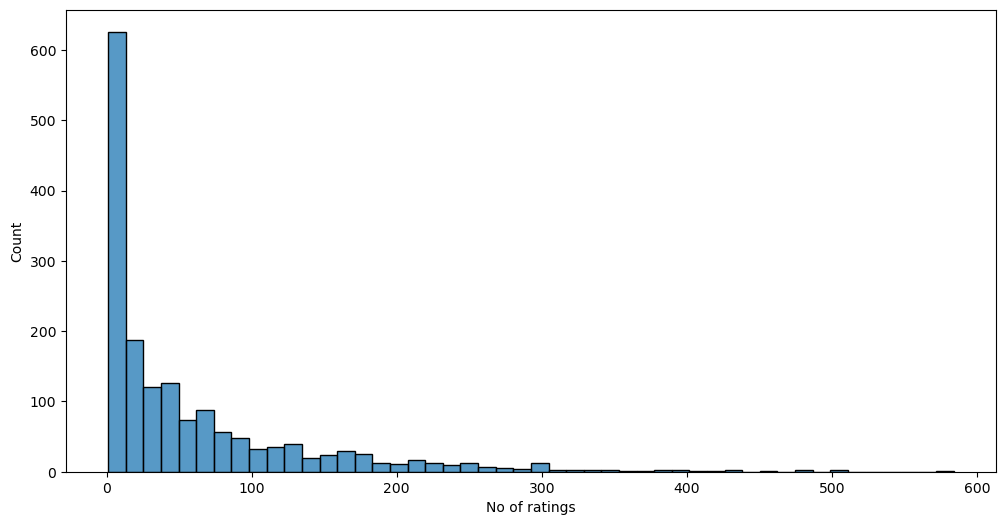

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(ratings['No of ratings'])

In [19]:
# Building Recommended System 

In [20]:
result.head()

,user_data,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [21]:
moviemat = result.pivot_table(index='user_data', columns='title', values='rating')

In [22]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_data,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
contact_user_ratings = moviemat['Contact (1997)']
scream_user_ratings = moviemat['Scream (1996)']

In [120]:
contact_user_ratings.head()

user_data
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [121]:
simailar_to_contact = moviemat.corrwith(contact_user_ratings)

/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encounter

In [122]:
simailar_to_contact.head()

title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [123]:
# Create a DataFrame
corr_contact = pd.DataFrame(simailar_to_contact,columns=['Correlation'])
corr_contact.dropna(inplace=True)

In [124]:
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


In [125]:
corr_contact = corr_contact.join(ratings)[['Correlation','No of ratings']]

In [126]:
corr_contact.head()

,Correlation,No of ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [127]:
# Choosing rating higher than 100
corr_contact[corr_contact['No of ratings'] > 100].sort_values('Correlation',ascending=False).head(5)

,Correlation,No of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


In [96]:
# Similar to Scream 

In [110]:
similar_to_scream = moviemat.corrwith(scream_user_ratings)

/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/sarwar-ahmad/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in mult

In [98]:
similar_to_scream.head()

title
'Til There Was You (1997)    0.454859
1-900 (1994)                -0.944911
101 Dalmatians (1996)        0.124059
12 Angry Men (1957)         -0.025659
187 (1997)                   0.382836
dtype: float64

In [112]:
corr_scream = pd.DataFrame(similar_to_scream,columns=['Correlation'])
corr_scream.dropna().head()

,Correlation
title,
'Til There Was You (1997),0.454859
1-900 (1994),-0.944911
101 Dalmatians (1996),0.124059
12 Angry Men (1957),-0.025659
187 (1997),0.382836


In [113]:
corr_scream = corr_scream.join(ratings)[['Correlation','No of ratings']]

In [114]:
corr_scream.head()

,Correlation,No of ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [115]:
# Scream (1996) recommendation 
corr_scream[corr_scream['No of ratings'] > 100].sort_values('Correlation',ascending=False).head()

,Correlation,No of ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111
